<a href="https://colab.research.google.com/github/Suhas-S63/Advanced_ML_Lab/blob/main/2348563_AML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
env_data = pd.read_csv('/content/drive/MyDrive/Program_4_Dataset.csv')
env_data.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [ ]:
env_data.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

From the above result , we can say that the dataset is clean and no additional operations on the dataset itself is not useful

In [ ]:
env_data.describe()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity
count,2878.000000,2.878000e+03,2878.000000,2878.000000,2878.000000
mean,719.000000,1.460520e+09,24.153648,1005.862543,80.653475
std,415.475606,3.715930e+06,4.925571,8.401371,22.736845
min,0.000000,1.456762e+09,14.800000,994.000000,40.000000
25%,359.250000,1.456805e+09,20.100000,997.300000,56.650000
50%,719.000000,1.460520e+09,26.000000,1010.500000,92.300000
75%,1078.750000,1.464235e+09,28.275000,1013.700000,100.000000
max,1438.000000,1.464278e+09,31.400000,1016.700000,100.000000


In [ ]:
env_data.shape

(2878, 6)

Preparing the Dataset

In [ ]:
# Here we are considering 'Temperature' attibute as the predictor variale and the target attribute is 'Pressure'
X = env_data['Temperature'].values.reshape(-1,1)
Y = env_data['Pressure']

In the following step we are considering 6 different degress for our Poynomial Regression Model with varying training and testing dataset rations

Using this we will create and train Regression Models with varying degrees and dataset sizes to predict on which variation the model is more accurate in predicting and for regression analysis

Model: 1, Polynomial_Degree: 1, Split_Ratio: Training -> 56.00000000000001  Testing -> 44.0
R2 Score: 0.551479069301182
Mean Squared Error: 31.605521340649865
Mean Absolute Error: 4.608680371777453




Model: 2, Polynomial_Degree: 1, Split_Ratio: Training -> 70.0  Testing -> 30.0
R2 Score: 0.5638281875671171
Mean Squared Error: 30.918459614710393
Mean Absolute Error: 4.55983970067398




Model: 3, Polynomial_Degree: 1, Split_Ratio: Training -> 60.0  Testing -> 40.0
R2 Score: 0.542067601055083
Mean Squared Error: 32.14859103107889
Mean Absolute Error: 4.636274291568331




Model: 4, Polynomial_Degree: 2, Split_Ratio: Training -> 56.00000000000001  Testing -> 44.0
R2 Score: 0.628054612377033
Mean Squared Error: 26.209541364676713
Mean Absolute Error: 3.6895136221702556




Model: 5, Polynomial_Degree: 2, Split_Ratio: Training -> 70.0  Testing -> 30.0
R2 Score: 0.64527735998073
Mean Squared Error: 25.14485646994188
Mean Absolute Error: 3.622318303738564




Model: 6, Polynomial_Degree: 2,

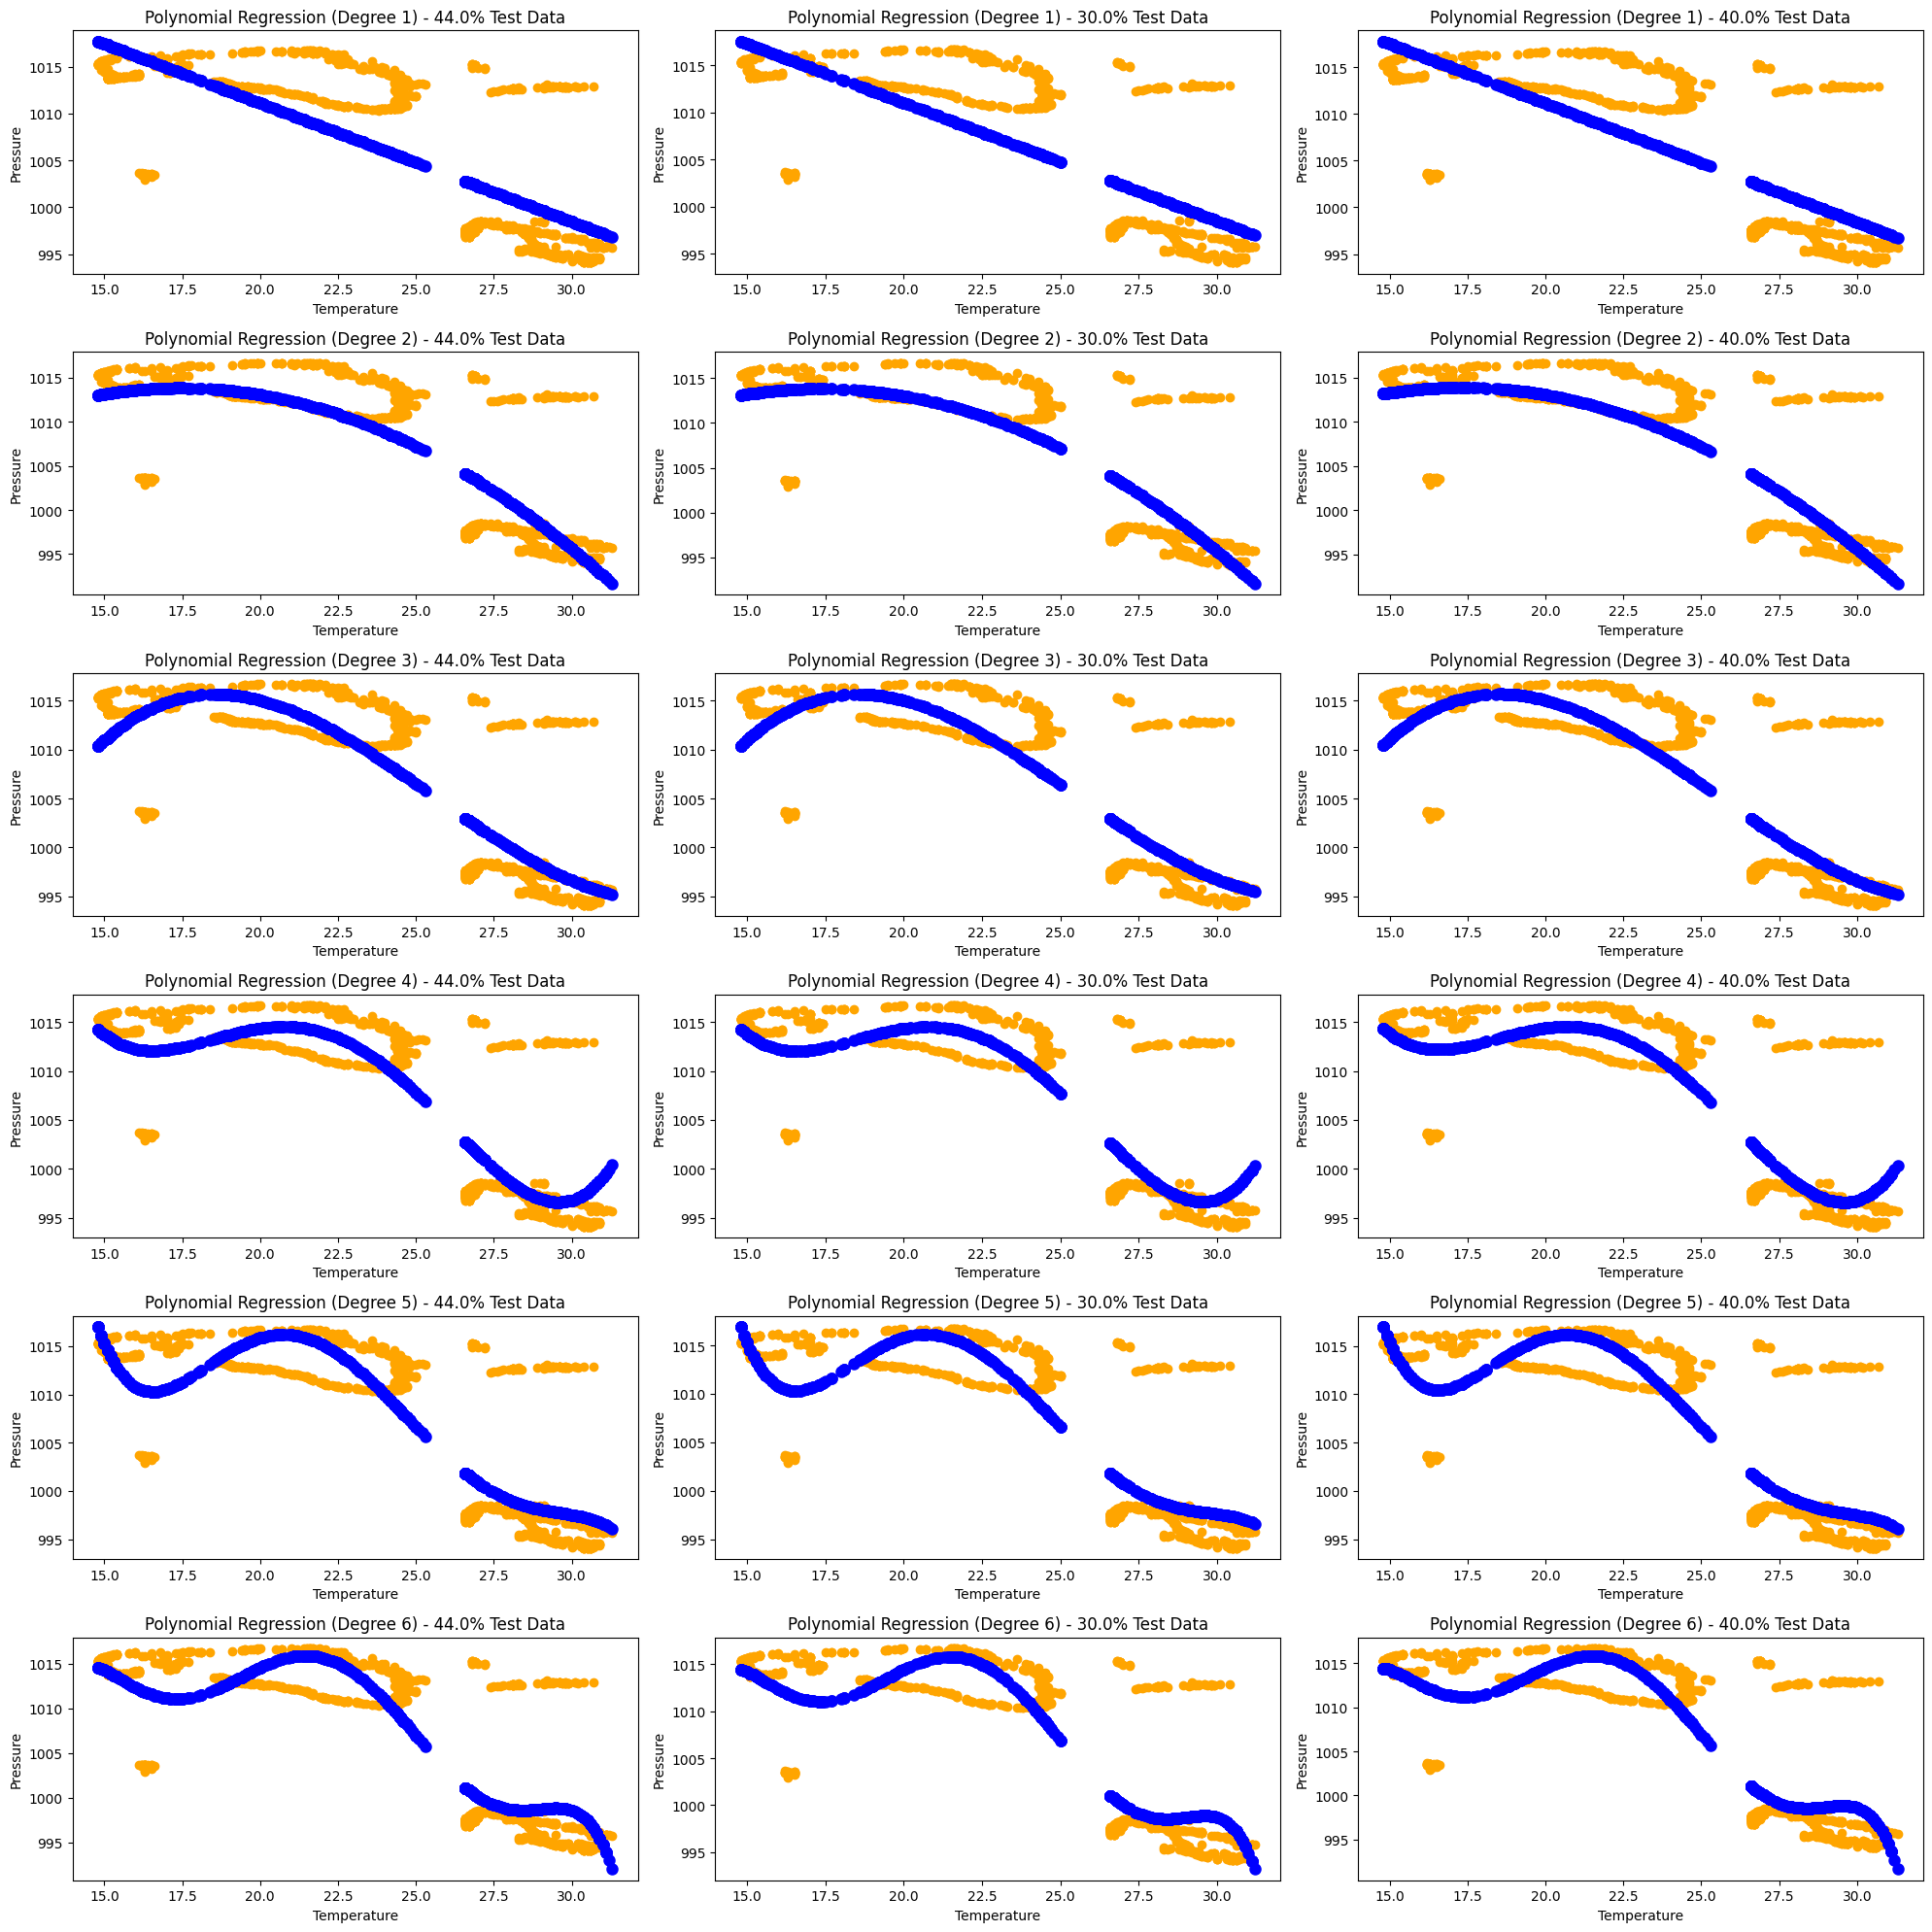

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

poly_degrees = [1,2,3,4,5,6]
train_test_set_splits = [0.44,0.3,0.4]

fig, axes = plt.subplots(len(poly_degrees), len(train_test_set_splits), figsize=(20, 20))

# Loops for training with all the variations
model_count = 0
for i,degree in enumerate(poly_degrees):
  for j,ratio in enumerate(train_test_set_splits):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = ratio, random_state =42)

    polynomial_f = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_f.fit_transform(X_train)
    X_test_poly = polynomial_f.fit_transform(X_test)

    # Model training
    model = LinearRegression()
    model.fit(X_train_poly,Y_train)

    # Model evaluation
    Y_predictions = model.predict(X_test_poly)

    # Performance Metrics
    model_r2_score = r2_score(Y_test,Y_predictions)
    model_mse = mean_squared_error(Y_test,Y_predictions)
    model_mae = mean_absolute_error(Y_test,Y_predictions)

    #Metric Display
    model_count+=1
    print(f'Model: {model_count}, Polynomial_Degree: {degree}, Split_Ratio: Training -> {(1-ratio)* 100}  Testing -> {ratio*100}')
    print(f"R2 Score: {model_r2_score}")
    print(f"Mean Squared Error: {model_mse}")
    print(f"Mean Absolute Error: {model_mae}")
    print("\n\n\n")

    # Plot the results
    axes[i,j].scatter(X_test, Y_test, color='orange')
    axes[i,j].scatter(X_test, Y_predictions, color='blue', linewidth=3)
    axes[i,j].set_title(f"Polynomial Regression (Degree {degree}) - {(ratio)*100}% Test Data")
    axes[i,j].set_xlabel('Temperature')
    axes[i,j].set_ylabel('Pressure')

plt.tight_layout()
plt.show()